# Data Exploration and Preprocessing using Python

Here we are exploring the Titatic dataset from kaggle website .
Here is the link for dataset : https://www.kaggle.com/c/titanic/data

**Dataset features:** <br>
* PassengerId : Unique ID 
* Survived: Wheteher a passenger survived or not. 1 if survived else 0 
* Pclass :Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
* Name: Passenger name
* Sex: Gender
* Age : Age of person
* SibSp: Number of siblings / spouses aboard the Titanic
* Parch: Number of parents / children aboard the Titanic
* Ticket : Ticket number
* Fare : Passenger fare
* Cabin: Cabin number
* Embarked: Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

###  Read data

Here we will use pandas library to read data that is in csv format. The data is saved in dataframe 'titanic_df'

In [2]:
titanic_df = pd.read_csv(r'./train.csv')


**Display first 10 rows of data**

In [3]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Lets explore our dataset now

**Shape of dataset**

In [4]:
titanic_df.shape

(891, 12)

**Total rows** : 891 <br>
**Total columns**: 12

**Describe()** : It will provide the descriptive statistics of the dataset. 

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Check data type of each column**

In [6]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**How many are survived?**

In [7]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

This tell us that 342 people survived and 549 people died

**How many men and women survived?**

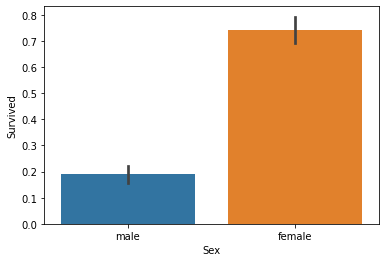

In [8]:
sns.barplot(x='Sex', y='Survived',  data=titanic_df)

### Count missing values at each column

In [9]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It shows that age has 177, cabin has 687 and Embarked has 2 missing values

**Drop PassengerID, Ticket , Name and Cabin column**

'Cabin' columns has mostly null values and not adding much information. so lets drop it

In [10]:
titanic_df = titanic_df.drop(columns =['PassengerId'])
titanic_df = titanic_df.drop(columns =['Cabin'])
titanic_df = titanic_df.drop(columns =['Ticket'])
titanic_df = titanic_df.drop(columns =['Name'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Impute Missing values

**1- Age** <br>
Replace missing values in age column for females by female's age mean .<br>
Similarly, replace missing values  for men's age by men's age mean

In [11]:
mean = titanic_df.groupby('Sex')['Age'].mean()
mean

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [12]:
titanic_df.loc[titanic_df.Age.isnull() & (titanic_df.Sex == 'female'),'Age'] = round(mean['female'],2)
titanic_df.loc[titanic_df.Age.isnull() & (titanic_df.Sex == 'male'),'Age'] = round(mean['male'],2)

**2- Embarked column**

In [13]:
titanic_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [14]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

**Check missing values again and how our dataset looks now**

In [15]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Convert features

**Sex** : Convert it to numerical <br>
**Embarked** : Convert it to numerical <br>
**Fare** : It is float type , so convert it to int type <br>
**Age** : It is float type , so convert it to int type


In [17]:
titanic_df['Sex'] = titanic_df['Sex'].map({"male": 0, "female": 1})

In [18]:
titanic_df['Fare'] = titanic_df['Fare'].astype(int)

In [19]:
titanic_df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [20]:
titanic_df['Embarked'] = titanic_df['Embarked'].map({"S": 0, "C": 1,"Q":2})

In [21]:
titanic_df['Age'] = titanic_df['Age'].astype(int)

In [22]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0


### Check for outlier values

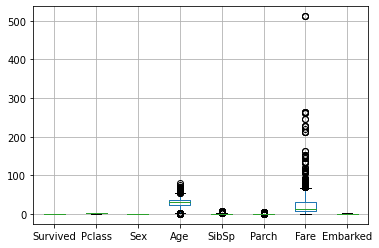

In [23]:
titanic_df.boxplot()

In [24]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [49]:
titanic_df1 =titanic_df.copy()
titanic_df2 =titanic_df.copy()

In [50]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0


In [51]:
# Create x, where x the 'scores' column's values as floats
x = titanic_df1[['Age','Fare']]

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
titanic_df1[['Age', 'Fare']]  = min_max_scaler.fit_transform(x)

In [52]:
titanic_df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,0.2750,1,0,0.013672,0
1,1,1,1,0.4750,1,0,0.138672,1
2,1,3,1,0.3250,0,0,0.013672,0
3,1,1,1,0.4375,1,0,0.103516,0
4,0,3,0,0.4375,0,0,0.015625,0


In [53]:
titanic_df1['Age'].describe()

count    891.000000
mean       0.369557
std        0.162843
min        0.000000
25%        0.275000
50%        0.375000
75%        0.437500
max        1.000000
Name: Age, dtype: float64

In [54]:
titanic_df1.Fare.describe()

count    891.000000
mean       0.062081
std        0.097078
min        0.000000
25%        0.013672
50%        0.027344
75%        0.060547
max        1.000000
Name: Fare, dtype: float64

In [55]:
scale = StandardScaler().fit(titanic_df2[['Age', 'Fare']])
titanic_df2[['Age', 'Fare']] = scale.transform(titanic_df2[['Age', 'Fare']])

In [56]:
titanic_df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,-0.580989,1,0,-0.498948,0
1,1,1,1,0.647880,1,0,0.789405,1
2,1,3,1,-0.273772,0,0,-0.498948,0
3,1,1,1,0.417467,1,0,0.427056,0
4,0,3,0,0.417467,0,0,-0.478817,0


In [43]:
titanic_df2.Age.describe()

count    8.910000e+02
mean    -5.582266e-17
std      1.000562e+00
min     -2.270684e+00
25%     -5.809889e-01
50%      3.344565e-02
75%      4.174672e-01
max      3.873661e+00
Name: Age, dtype: float64

In [44]:
titanic_df2.Fare.describe()

count    8.910000e+02
mean     3.787966e-17
std      1.000562e+00
min     -6.398612e-01
25%     -4.989476e-01
50%     -3.580340e-01
75%     -1.581522e-02
max      9.666962e+00
Name: Fare, dtype: float64

In [58]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0
